# 0. Problem Exposition and Business Value


**Background and Problem:**


The problem we face relates to mental health at work, the associated costs and the services offered to employees that may help them manage and ultimately treat their mental health issues. In a single question, I frame the problem as "**is it possible to accurately predict which individuals in the workplace have a mental illness, so that they may be offered the support and services they need as part of company initiatives?**"

In the past two decades or so, nearly every major mental illness, from Major Depressive Disorder (MDD) to Post-Traumatic Stress Disorder (PTSD) to Bipolar Disorder, has seen rates of incidence rise significantly. Many of these have skyrocketed. As a result, more emphasis has been placed on the importance of mental health as the costs to the individual and to society become more apparent.

Needless to say, raising awareness around mental health issues and devoting more resources towards finding better treatments at an institutional level and making them affordable are the most important issues. And these too for their own sake, without any further agenda or goal other than to improve quality of life and minimise suffering.

However, I am tackling this as a business problem and so I will discuss the consequences and costs of mental health illnesses in a business context.


---

**The Business Case:**

 The major costs for businesses of untreated mental illnesses among employees are:

- absenteeism
- loss of productivity
- employee burnout
- health insurance
- rehiring (to replace an employee who has discontinued work due to mental healh reasons)

According to the [World Economic Forum](https://www.weforum.org/reports/global-economic-burden-non-communicable-diseases), mental health conditions will cost $16.1 *trillion* from 2011 to 2031 with a "dramatic impact on productivity and quality of life". 

If we are able to accurately predict the individuals in the workplace who have a mental health condition and offer them the support and resources they need, businesses may save [2 to 4 USD for every dollar they spend on intervention and prevention](https://www.thelancet.com/journals/lanpsy/article/PIIS2215-0366(16)30024-4/fulltext)

So, offering mental health services at work not only improves company culture, potentially making it easier to hire talent, but also makes sense from a purely financial point of view.

---

**Framing the analysis:**

Let us make things more specific and restrict the scope of the problem to frame the analysis better. If a company is confident that an employee has a mental health condition, it could offer the employee a mental health checkup that includes the services of a therapist, counsellor or psychiatrist, in addition to other resources. 

This checkup presents a monetary cost to the company, so its leadership cannot set aside an annual budget to perform one on every employee. This may be possible in an SME with 50 employees, but not in a company where the workforce numbers 50,000+. 

So my aim is to build a machine learning model that can accurately predict if an individual has a mental health condition. If it does, a company may set aside a budget at the start of the year to be spent on mental health checkups that involve a professional therapist, counsellor or psychiatrist.

# 1. Import libraries and functions

In [120]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# specific functions/classes

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

# algorithms

from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [115]:
# write simple functions to be used later on

# replace ambiguous values in data

def replace_amb_value(df, column, ambiguous_value):
    
    df[column] = np.where(df[column] == ambiguous_value, np.NaN, df[column])
    df[column].fillna(method = 'pad', inplace = True)
    
# plot categorical features

def plot_cat(column, viz_title, colour):
    
    column_values = pd.DataFrame(data_2014[column].value_counts()).reset_index()
    plt.figure(figsize = (12, 6))
    plt.bar(column_values['index'], column_values[column], color = colour)
    plt.xlabel('Answer to Question')
    plt.ylabel('Number of Cases')
    plt.title(viz_title)

# 2. Data Source, Explanation and Loading


The data is provided by [Open Source Mental Illness](https://osmihelp.org/research) and is taken more specifically from their [2014 survey](https://www.kaggle.com/osmi/mental-health-in-tech-survey). There are datasets available for more recent years but they contain very few observations. The 2014 dataset is also lacking in this area with 1225 observations, but it is the best we can do.


There are 26 features, most of which are questions about mental health at work that elicit a binary "Yes/No" response. A few examples are:

- family_history: Do you have a family history of mental illness?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

I will explain the other variables as they come up in my EDA.

**Important caveat:**

Finally, there is a large caveat about this work. The outcome variable I am using is 'treatment' which asks "Have you sought treatment for a mental health condition?". This is clearly not the same as an ideal outcome variable which would ask "Do you have a mental health condition?". So I am taking some liberties with this aspect and I am using the former as a proxy for the latter, because I feel these questions are close enough to each other.

Of course, it is possible that an individual who does have a mental health condition did not seek treatment for it, especially due to the stigma that persists around mental illness. The reverse case is not much of an issue.

As a result, this analysis is not perfect and has shortcomings that I acknowledge. However, I still believe it can provide some important insights about our problem. With that said, let's begin the analysis.

In [50]:
# load data

data_2014 = pd.read_csv('/Users/alitaimurshabbir/Desktop/Personal/DataScience/GitHub/mental-health-machine-learning/mentalHealthsurvey2014.csv')
data_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# 3. Data Cleaning

## Missing Data

In [51]:
# find out % of data missing

missing_data = round((data_2014.isnull().sum().sum()/np.product(data_2014.shape))*100, 2)
print('{}% of data is missing'.format(missing_data))

5.57% of data is missing


In [52]:
missing_sum = data_2014.isnull().sum() 
missing_sum.sort_values()
percent_missing = (((missing_sum/len(data_2014.index))*100).round(2))

summaryMissing = pd.concat([missing_sum, percent_missing], axis = 1, keys = ['Absolute Number Missing', '% Missing'])

summaryMissing.sort_values(by=['% Missing'], ascending=False, inplace = True) 

In [111]:
# only show columns with missing data
summaryMissing[summaryMissing['% Missing'] > 0]

,Absolute Number Missing,% Missing
comments,1095,86.97
state,515,40.91
work_interfere,264,20.97
self_employed,18,1.43


#### 'Self Employed': replace NaNs with mode

The 'self_employed' variables has a lot of NaNs. Instead of dropping these observations, I will replace the NaNs with the variavle Mode

In [57]:
data_2014.self_employed.isnull().sum()

18

In [58]:
data_2014['self_employed'].fillna('No', inplace = True)

#### 'Work Interfere': replace NaNs with ffill

As above

In [59]:
data_2014.work_interfere.isnull().sum()

264

In [60]:
data_2014['work_interfere'].fillna(method = 'pad', inplace = True)

### Replace ambiguous values ("Maybe", "Don't know", "Not Sure")  for binary features

For several questions with binary answers ("Yes" and "No"), there exist additional answers that are of an ambiguous nature ("Maybe", "Not Sure"). 

First we will have to replace these ambiguous values with NaNs. 


Then we use ffill, as above. Using ffill will help us keep a more similar distribution of the existing "Yes" and "No" answers than if we replaced the NaNs with the mode

In [62]:
# benefits - Don't know
replace_amb_value(data_2014, 'benefits', "Don't know")

# wellness_program - Don't know
replace_amb_value(data_2014, 'wellness_program', "Don't know")

# seek_help - Don't know
replace_amb_value(data_2014, 'seek_help', "Don't know")

# mental_vs_physical
replace_amb_value(data_2014, 'mental_vs_physical', "Don't know")

# anonymity - Don't know
replace_amb_value(data_2014, 'anonymity', "Don't know")

# 'mental_health_consequence' - Maybe
replace_amb_value(data_2014, 'mental_health_consequence', "Maybe")

# 'phys_health_consequence' - Maybe
replace_amb_value(data_2014, 'phys_health_consequence', "Maybe")

# 'phys_health_interview' - Maybe
replace_amb_value(data_2014, 'phys_health_interview', "Maybe")

# 'mental_health_interview' - Maybe
replace_amb_value(data_2014, 'mental_health_interview', "Maybe")

# care_options - Not sure
replace_amb_value(data_2014, 'care_options', "Not sure")

In [63]:
data_2014.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    1
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           1
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [64]:
# replace the two NaNs for phys_health_interview and care_options with
# the mode for those features

data_2014['care_options'].fillna(data_2014['care_options'].mode(), inplace = True)
data_2014['phys_health_interview'].fillna(data_2014['phys_health_interview'].mode(), inplace = True)

## Clean Dirty Data

In [65]:
# drop irrelevant columns

data_2014.drop(['comments', 'Timestamp'], axis = 1, inplace = True)

**Age**

In [66]:
# Investigate Age

data_2014.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

There are erroneous observations that are either negative or distorting the mean of Age

In [67]:
data_2014[data_2014['Age'] > 80]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,...,Yes,Don't know,No,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


In [68]:
# replace erroneous Age values with median, as mean is affected by large erroneous value

data_2014['Age'].replace(329, data_2014['Age'].median(), inplace = True)
data_2014['Age'].replace(99999999999, data_2014['Age'].median(), inplace = True)

In [69]:
data_2014[data_2014['Age'] < 16]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,United States,MN,No,No,No,Never,More than 1000,Yes,...,Yes,Don't know,No,No,Some of them,Yes,No,No,Yes,No
715,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,...,Yes,Somewhat difficult,Yes,No,No,No,No,No,No,No
734,5,Male,United States,OH,No,No,No,Often,100-500,No,...,Yes,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1090,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,...,Yes,Very easy,No,No,Some of them,Some of them,No,No,Yes,No
1127,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [70]:
# replace Age < 16 with median age
data_2014['Age'] = np.where(data_2014['Age'] < 16, data_2014['Age'].median(), data_2014['Age'])

#### Gender

Here we will correct case-sensitive values such that 'male' and 'Male' are counted as 'Male' only, for example.

I will also drop all values that are not explicitly Male or Female because they each have < 5 observations, which is not enough data.

In [71]:
data_2014.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Cis Male                                            2
Female                                              2
Man                                                 2
cis-female/femme                                    1
All                                                 1
Agender                                             1
queer                       

In [72]:
data_2014.Gender.replace({'male':'Male', 'M':'Male', 'm':'Male',
                          'female':'Female','F':'Female', 'f':'Female',
                          'Make':'Male', 'Woman': 'Female', 'Cis Male': 'Male',
                          'Man':'Male', 'Female (trans)': 'Female',
                          'Male ': 'Male', 'Female ': 'Female'}, inplace = True)

In [73]:
data = data_2014.loc[ (data_2014['Gender'] == 'Male') | (data_2014['Gender'] == 'Female') ]

# 4. EDA

There are 27 features in the dataset, so I am going to explore a select few of the more interesting ones

### Explore the outcome variable 'treatment'

As previously mention, this dataset does not have an explicit question that asks an individual whether or not they have a mental illness. As a result, our best solution is to use a proxy, for which the 'treatment' question is best.

The question asks the individual whether or not they have sought treatment for a mental illness before. If they have, then it is safe to say that the individual believes they have a mental illness or could be likely to develop one.

However, the reverse option is trickier; it is quite possible, and even likely given the stigma around mental illness, for individuals to suffer from a mental illness and not seek treatment. In this case, this would give a false representation in our data.

Nonetheless, this is the best option we can choose. The visualisation below shows us an almost 50/50 distribution among cases that answered 'No' vs 'Yes

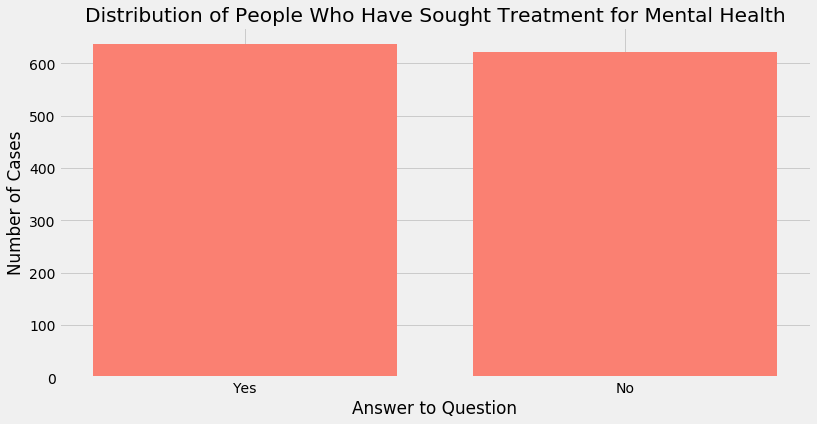

In [75]:
plot_cat('treatment',
         'Distribution of People Who Have Sought Treatment for Mental Health',
         'salmon')

Luckily from a machine learning point of view, we have a near equal split of "Yes" and "No" outcomes.

### Variables that illustrate the cultural attitude of a company towards mental health

#### 'Leave'

This variable asks the question "How easy is it for you to take medical leave for a mental health condition?". A company policy regarding mental health leave is a major indicator of the attitude of its culture towards mental health

Additionally, it is possible that an individual for whom the degree of mental illness is not severe at a given point may see an increase in the severity of their symptoms if obtaining mental health leave proves to be difficult

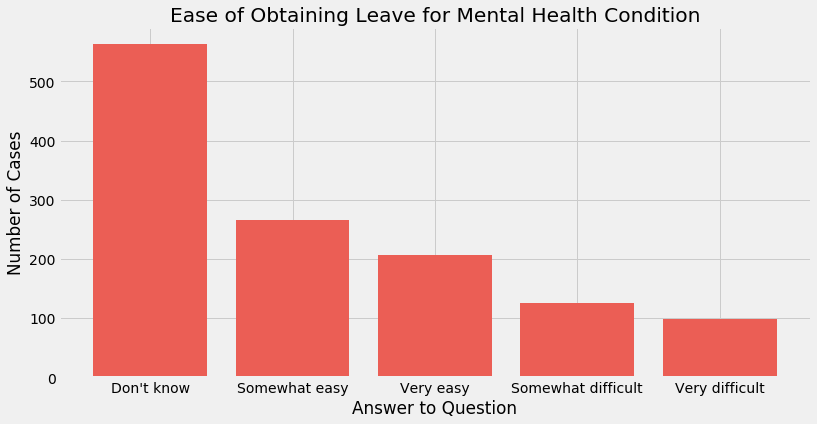

In [76]:
plot_cat('leave',
         'Ease of Obtaining Leave for Mental Health Condition',
         '#EB5E55')

- A majority of individuals do not know the ease with which they could obtain mental health leave. One possible interpretation is that the stigma around mental health prevents individuals from asking for mental health leave in the first place.


- Of the individuals that did ask for mental health leave, most found it 'somewhat easy' or 'very easy' to obtain it. However, a significant amount of individuals (over 300) found it at least somewhat difficult to obtain it, which is concerning.

#### 'Benefits'

This variable asks the question "Does your employer provide mental health benefits?". Benefits could take the form of separate leave for mental health or a company counsellor or therapist, for example.

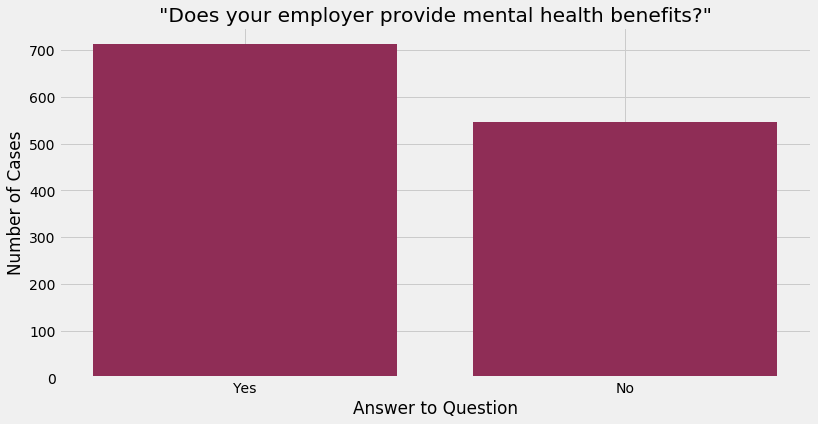

In [77]:
plot_cat('benefits',
         '"Does your employer provide mental health benefits?"',
         '#8F2D56')

About 56% of respondents already receive mental health benefits at their workplace, so there is still a large number of employees who do not have access to such benefits at their workplace

'**Anonymity**'

Asks "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?". Like the two questions above, this is a good indicator of company policy towards mental health; a high number of 'No' responses would indicate that employees are not incentivised to discuss mental health or use provided resources

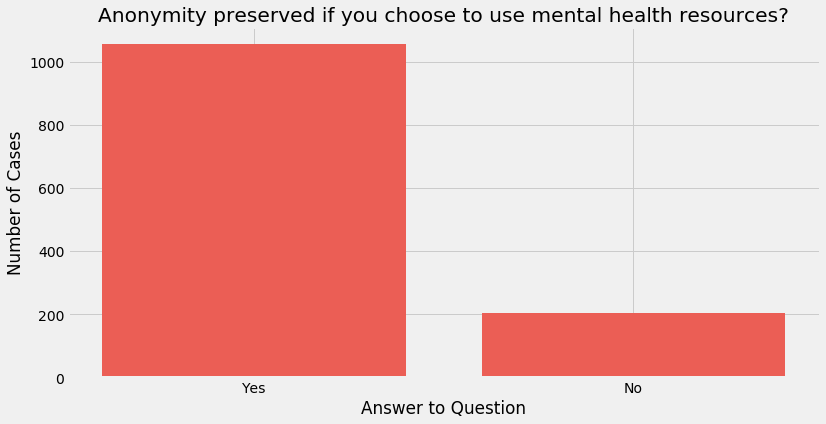

In [78]:
plot_cat('anonymity',
         'Anonymity preserved if you choose to use mental health resources?',
         '#EB5E55')

Anonymity for most employees is preserved should they choose to avail services and this is important due to mental health stigma.

### Variables with possible links to causing mental illness 

#### 'Family History'

This question asks whether the respondent has had an instance of mental illness in their family. In psychiatry, this can and has been a significant predictor of the risk of an individual developing a mental illness.

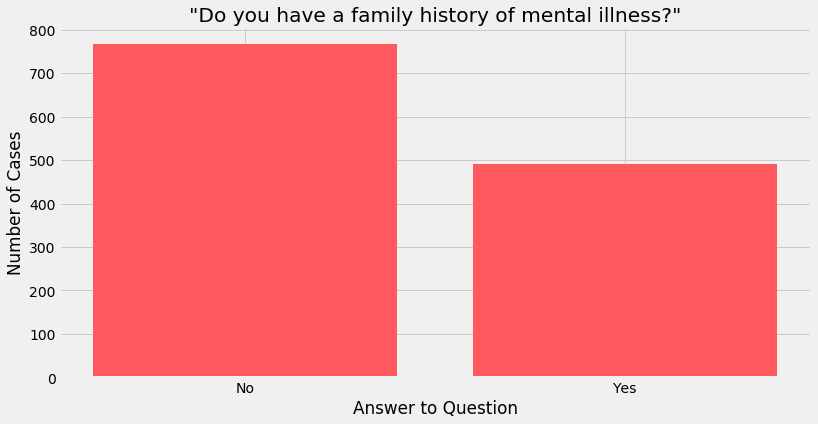

In [79]:
plot_cat('family_history',
         '"Do you have a family history of mental illness?"',
         '#FF595E')

A significant chunk of employees said that somebody in their family had a mental illness. Taken together with the reasoning above and the distribution of the 'treatment' variable, it suggests that a family history of mental illness plays a significant role in having a similar illness manifest in other members of the family

#### 'Age'

Age is an interesting variable with respect to mental illness because studies have found age-related causes of depression for many age groups. 

- Older adults towards the end of their careers have been found to experience rising levels of loneliness, which can be a major factor in developing depression.


- On the other hand, younger generations and young adults in particular are known to use social media to a greater extent than some other age groups, and social media usage is again explicitly linked with developing mental illness.

Such theorising can be done for many age groups.

First, we will look at the distribution of the Age variable, then find how the answer to the 'treatment' variable varies with 'Age'

Text(0.5, 0, 'Range')

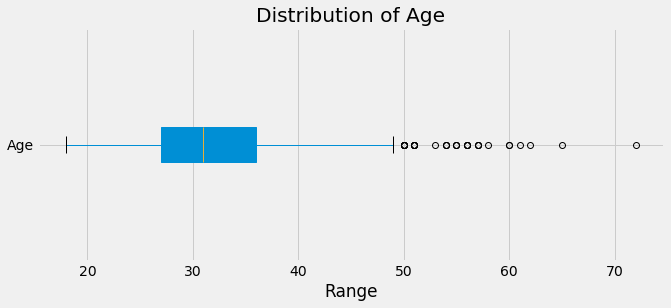

In [80]:
# find distribution of Age

plt.figure(figsize = (10, 4))
data_2014.boxplot('Age', vert = False, patch_artist = True)

plt.title('Distribution of Age')
plt.xlabel('Range')

- 50% of respondents are between approximately 27 and 36 years old with a median age of around 31/32. In other words, a majority of respondents have been in the workforce for about more than a decade and less than two decades, assuming no employment gaps


- There are a few outliers mainly in the 50 to 60 range. Given their work experience, it is possible they are company executives. There are also 3 individuals older than 60 years of age

In [81]:
# bin age groups for visualisation

bins = [15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
data['Binned Age'] = pd.cut(data['Age'], bins)

In the following graph, we see how 'treatment' varies with 'Age'. 


- The x-axis is in ascending order of Age Groups, which cover one decade each except for the age range 15 to 40, which is binned into 5-year intervals. This was done because the majority of data lies here and more precise binning would yield more nuance


- The colour of each bar shows us whether the answer to 'treatment' was 'yes' (green) or 'no' (red). This is done because the oldest age groups have 1 or 2 observations each and so they do not always have both a 'Yes' answer and a 'No' answer.

Text(0.5, 1.0, 'How "Treatment" Variable Changes With Age Group')

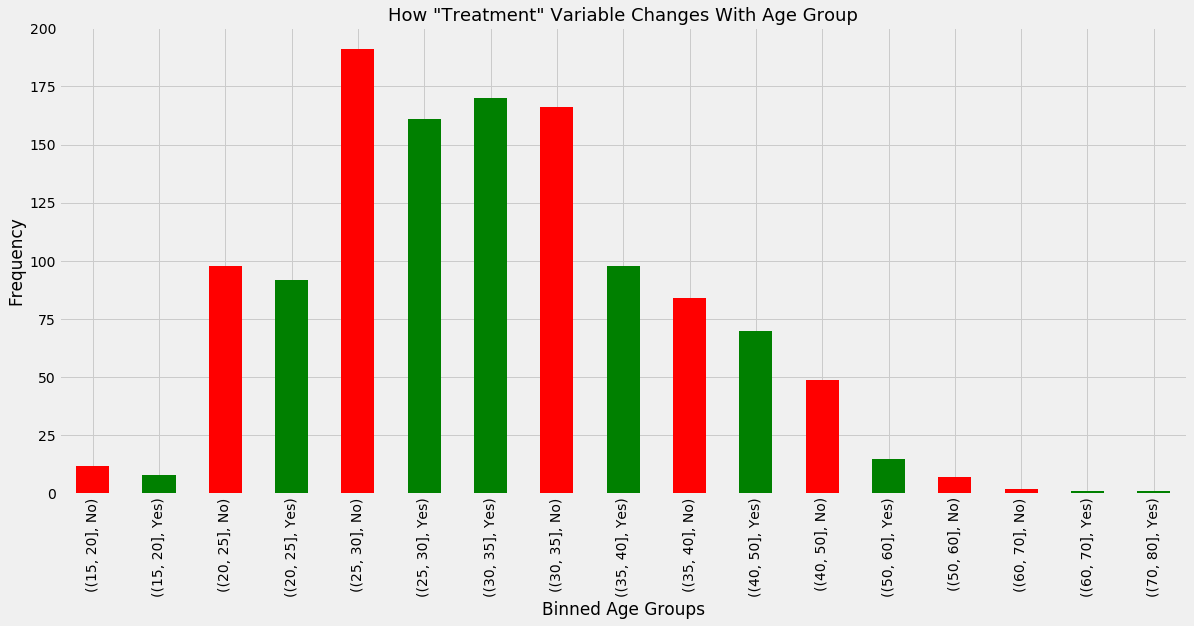

In [82]:
plt.figure(figsize = (18, 8))

data.groupby('Binned Age')['treatment'].apply(lambda x: x.value_counts()).plot(kind = 'bar',
                                                                               color = ['red', 'green',
                                                                                        'red', 'green',
                                                                                        'red', 'green',
                                                                                        'green', 'red',
                                                                                        'green', 'red',
                                                                                        'green', 'red',
                                                                                        'green', 'red',
                                                                                        'red', 'green',
                                                                                        'green'])
plt.xticks(fontsize = 14)    
plt.xlabel('Binned Age Groups', fontsize = 17)
plt.ylabel('Frequency', fontsize = 17)
plt.title('How "Treatment" Variable Changes With Age Group', fontsize = 18)

**Observations**

- It is difficult to make generalisations about to 15 - 20 group, since there are so few data points. From what data is available, the response to 'treatment' is slightly in favour of 'No'. This is interesting because it does not conform to the possibility laid out earlier involving social media usage


- There are more 'No' responses in the 15-20, 20-25 and 25-30 groups. For all other groups with at least 2 'Yes' and 2 'No' answers, the 'Yes' responses are higher. This suggests that older people in this dataset are more likely to have a mental health condition.


- The biggest gap between those who have a mental health condition and those who don't occurs in the 40-50 age group when "Yes" responses outweight "No" responses. For the reverse scenario, the relevant age group is 25-30. This further points to a skew in having a mental health condition towards older individuals.

  However, there are no age groups where one response outweighs the other to a very large degree.
  

#### 'Observed Consequences'

The variable 'obs_consequence' asks "Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?"

If the answer is yes, this could be distressing to an employee who may suspect they have a mental health condition and they may wish to keep it secret as a result.

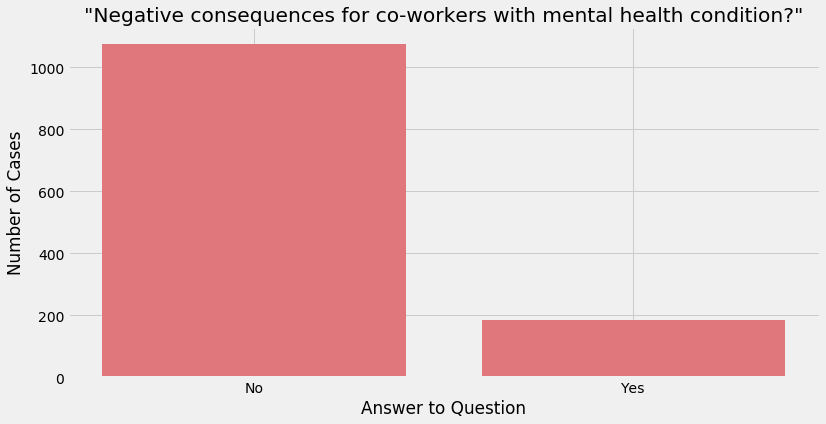

In [83]:
plot_cat('obs_consequence', '"Negative consequences for co-workers with mental health condition?"', '#E0777D')

In [84]:
data.obs_consequence.value_counts()

No     1050
Yes     175
Name: obs_consequence, dtype: int64

While the majority of answers are "No", it is still concerning that 14+% of employees answered "Yes". From a business perspective, discrimination against mental health conditions is a surefire way to increase costs associated with employee rehiring, burnout, absenteeism and loss of productivity. 

It is also possible that this type of cultural attitude worsens mental health conditions among employees as they may expect to be punished for being more open about their condition

# 5. Feature Engineering

### Encoding

Almost all of the features in the dataset are categorical in nature. Some are ordinal, which means a natural order can be imposed to distinguish values. An example would be that "sometimes" is clearly less frequent then "often" which itself is clearly less frequent than "always". 

However, most features are nominal, which means there is no intuitive way to order the values present. An example of such answers would be "chocolate" and "orange" or "Yes" vs "No"

As a result we are going to encode these two types of categorical variables in different ways: manual encoding for ordinal ones and dummy variables for nominal ones

In [86]:
# write for loop to create dummies for binary answer questions

binary_features = ['self_employed', 'family_history', 'remote_work',
                   'tech_company', 'benefits', 'care_options',
                   'wellness_program', 'seek_help', 'mental_health_consequence',
                   'phys_health_consequence', 'mental_health_interview','obs_consequence',
                   'phys_health_interview', 'mental_vs_physical', 'anonymity', 
                    'treatment']

In [87]:
for column in binary_features:
    data[column] = np.where(data[column] == 'Yes', 1, 0)

In [88]:
# for gender

data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

In [90]:
ordinal_features = data[['work_interfere', 'supervisor', 'coworkers', 'leave']]

In [91]:
data = data.replace({'work_interfere': {'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3}})

data = data.replace({'supervisor': {'No':0, 'Some of them':0.5, 'Yes':2}})

data = data.replace({'coworkers': {'No':0, 'Some of them':0.5, 'Yes':2}})

data = data.replace({'leave': {'Very difficult':0, 'Somewhat difficult':1,
                               'Somewhat easy':2, 'Very easy':3,
                               "Don't know": 1.5}})

### Correlations among variables

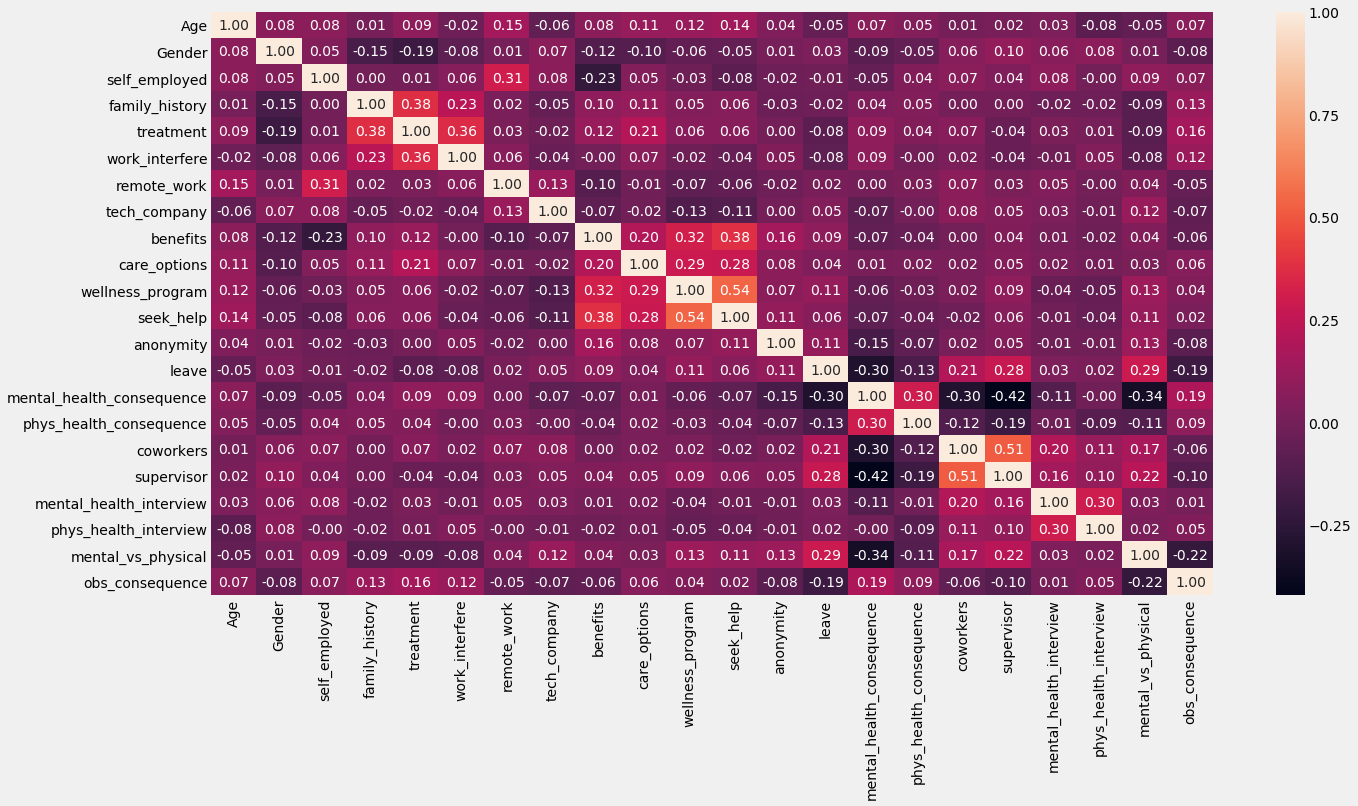

In [92]:
plt.figure(figsize = (20, 10))

sns.heatmap(data.corr(), annot=True, fmt='.2f')

### A few interesting correlations:

Small reminder that we cannot infer causality from this analysis and that the following interpretation is simply my own theorising, which can be wrong:

- **Family History and Treatment**: As suspected, when compared to other variables, Family History has a strong correlation with the outcome variable Treatment with a coefficient of 0.38. One possible reason is that mental  illnesses can be genetically inherited, as the fields of psychiatry and neuroscience have found strong evidence for. Another possible reason is that growing up in a household where one or more parents has a mental illness may result in more stressful relationships and more stress overall, contributing to the chances of developing a mental illness in children


- **Work Inteference and Treatment**: The 'work_interference' variable asks the question "If you have a mental health condition, do you feel that it interferes with your work?". A positive coefficient of 0.36 makes sense; the question is phrased in a way that screens for those who already know they have a mental illness. So it is obvious that an individual who knows they have a mental illness that inteferes with their work would be more likely to seek treatment than someone who knows they don't have a mental illness


- **Leave and Supervisor + Leave and Coworkers**: The 'supervisor' variable asks "Would you be willing to discuss a mental health issue with your direct supervisor(s)?", the 'coworkers' variable asks "Would you be willing to discuss a mental health issue with your coworkers?" and finally the 'leave' variable asks "How easy is it for you to take medical leave for a mental health condition?" 

  The coefficients of the first two variables with 'leave' are 0.28 and 0.21, respectively, so both correlations are positive but weak. Nonetheless, these findings could hold an important lesson for corporations; if companies could employ initiatives that help employees believe they could speak to their supervisors candidly about mental health issues, they could feel more comfortable asking for a mental health leave. Similarly, if company initiatives normalise talking about mental health with one's coworkers, that too could lead to a similar result. 

  Most importantly, this is a desirable outcome because employees would be more confident in managing their mental health illnesses, an unambiguous net positive for society. However, this could also have value for the company beyond creating a better, more accepting culture as mental health leaves could reduce overall employee burnout and turnover
  
  
- **Mental Health Consequence and Supervisor**: The 'mentalhealthconsequence' variable asks "Do you think that discussing a mental health issue with your employer would have negative consequences?". This correlation is negative in nature and moderate in magnitude, at -0.42.

  This suggests that if employees are willing to discuss mental health issues with their supervisors, they are more confident that they will not face negative consequences with their 'employer', which could be the supervisor or HR; the data does not make this clear

  Still, it further points to the idea that supervisors, and possibly other figures of authority in the workplace such as a vice president or c-suite executives, have an important role to play in making a company's culture more welcoming and aware of mental health issue management among employees

# 6. Baseline Prediction

For a simple baseline prediction, I am going to ask the question "how accurate is my prediction be if I always guess 'Yes' in the context of the question 'Have you sought treatment for a mental illness?'". 


This is a suitable option because of the binary nature of the outcome variable, because we do not have much data and because it will give us a clear benchmark to improve upon with our models. To find this benchmark, we need to think about how to measure it first.

## Deciding upon which evaluation metric to choose and pursue

We have three main evaluation metrics for our classifiers: accuracy, precision and recall. Each of these measures how well our classifiers predict an unseen case in slightly different ways. 

To understand the differences between them and to figure out which is the most appropriate metric to use in our case, we need to understand the concepts of True Positives, True Negatives, False Positives and False Negatives.

However, that would take away from the flow of analysis for this problem, so I have placed the explanations for those concepts at the end of the notebook. Please read ahead if you would like to read that information.

----

For now, I believe we have to use both Precision and Recall, with a slight preference for optimising Recall, given the nature of the problem we face. Here is why.

We want to be able to predict if an individual is suffering from a mental illness, so that we can take that prediction into account when deciding whether an individual should be approached and asked if they would like to go under a mental health checkup. 

- Optimising Recall means minimising False Negatives. The consequences of having low Recall are that we will 'miss' detecting many people who have mental illnesses.

  The cost from a business viewpoint of low Recall in this context is employee leave, lost productivity, burnout and rehiring.
  
  
- Optimising Precision means minimising False Positives. The consequences of having low Precision are that we will predict many people have mental illness, when in fact they do not.

  The cost of low Precision in a similar vein is performing what could be costly mental health checkups on people when they are not needed.


For a business, the cost of low Recall is clearly greater than that of low Precision, but it does not mean Precision can be neglected completely. To reiterate, we can clearly set aside a budget and offer checkups for a smaller number of employees. But what about a situation in which we have 100,000 employees? The cost of having low Precision would multiply very quickly.

As a result, I prefer a model that slightly favours recall over Precision, instead of neglecting Precision completely. Nonetheless, for curiosity's sake, I will illustrate the performance of my models using all 3 metrics. Then I will choose the model with the best levels of Recall and Precision and tune its hyperparameters to improve its performance further. 

In [93]:
data['Baseline Prediction'] = 1 # always predict '1' which is equal to 'Yes'
y_train = data['treatment']
y_predicted = data['Baseline Prediction']

# calculate accuracy score

recall_baseline = recall_score(y_train, y_predicted)
precision_baseline = precision_score(y_train, y_predicted)
print('The baseline model recall score is {}% and the precision score is {}%'.
      format(recall_baseline*100, round(precision_baseline*100, 2)))


The baseline model recall score is 100.0% and the precision score is 50.29%


The baseline model performance shows us this: If we always guess 'Yes', we detect 100% of the people who have a mental illness. This is unsurprising. However, the cost associated with this is that we have a lot of False Positives and this is reflected in the Precision score.


Of all the people our model predicted have a mental illness, only about half actually did. In a company with 100,000 people, this would mean having a budget for 100,000 employees, when only about just over half of that is needed.

This is obviously not a good enough performance and so serves as an ideal benchmark to improve over.

# 7. Train Models

In [94]:
# reinitialise X_train and y_train

X_train = data.drop(['Country', 'state',
                     'no_employees', 'treatment',
                     'Binned Age'], axis = 1)

y_train = data['treatment']

In [117]:
# write for loop to train and evaluate chosen classifiers

classifiers = [LogisticRegression(solver = 'lbfgs', max_iter = 10000),
               LinearSVC(max_iter = 50000),
               MultinomialNB(),
               BernoulliNB(),
               RidgeClassifier(),
               AdaBoostClassifier(),
               DecisionTreeClassifier(),
               PassiveAggressiveClassifier(random_state = 11),
               KNeighborsClassifier()]

metrics_df = pd.DataFrame(columns = ['Classifier', 'Accuracy', 'Precision', 'Recall'])

for clf in classifiers:
    
    name = clf.__class__.__name__    
    
    accuracy_scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv=5)
    accuracy_mean = accuracy_scores.mean()
    
    precision_scores = cross_val_score(clf, X_train, y_train, scoring = 'precision', cv=5)
    precision_mean = precision_scores.mean()
    
    recall_scores = cross_val_score(clf, X_train, y_train, scoring = 'recall', cv=5)
    recall_mean = recall_scores.mean()
    
    log_entry = pd.DataFrame([[name, accuracy_mean*100,
                               precision_mean*100, recall_mean*100]],
                               columns=['Classifier', 'Accuracy', 'Precision', 'Recall'])
    
    metrics_df = metrics_df.append(log_entry)

In [118]:
metrics_df.sort_values('Recall', ascending = False, inplace = True)
round(metrics_df, 2)

,Classifier,Accuracy,Precision,Recall
0,PassiveAggressiveClassifier,57.39,56.90,90.89
0,AdaBoostClassifier,71.91,71.21,75.00
0,BernoulliNB,71.75,71.78,73.22
0,LinearSVC,72.24,72.78,72.73
0,LogisticRegression,72.49,73.08,72.57
0,RidgeClassifier,72.57,73.14,72.57
0,MultinomialNB,68.81,69.44,68.68
0,KNeighborsClassifier,64.40,65.20,62.65
0,DecisionTreeClassifier,62.37,63.57,62.01


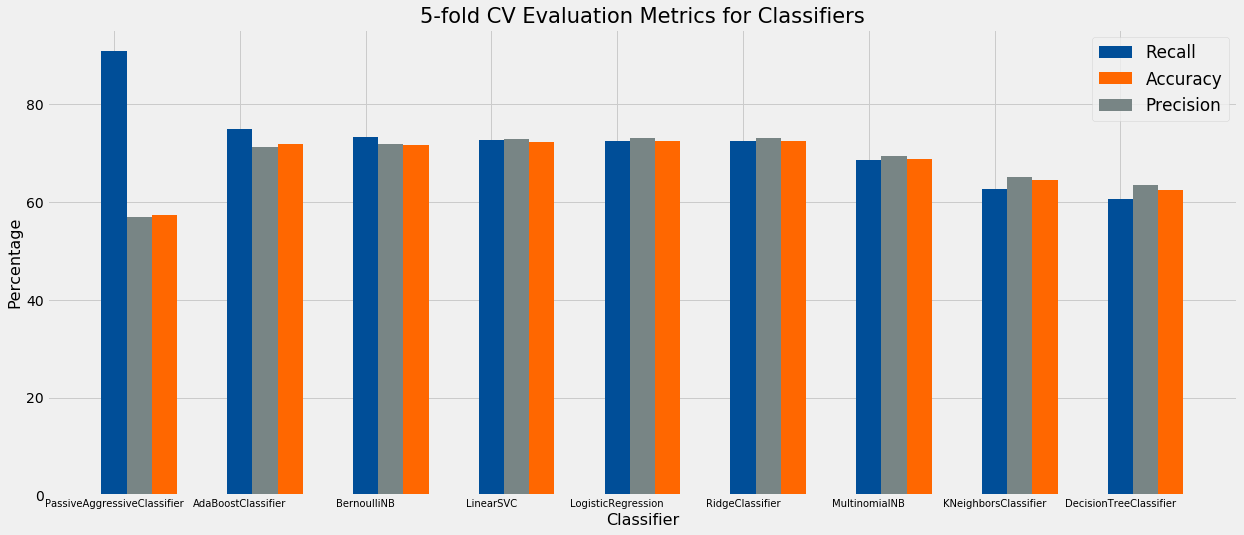

In [101]:
plt.figure(figsize = (19, 8))

X = list(metrics_df['Classifier'].values) 

Accuracy_bar = list(metrics_df['Accuracy'].values)
Precision_bar = list(metrics_df['Precision'].values)
Recall_bar = list(metrics_df['Recall'].values)

X_axis = np.arange(len(X))

plt.bar(X_axis, Recall_bar, 0.2, label = 'Recall', color = '#004E98')
plt.bar(X_axis + 0.40, Accuracy_bar, 0.2, label = 'Accuracy', color = '#FF6700')
plt.bar(X_axis + 0.20, Precision_bar, 0.2, label = 'Precision', color = '#788585')


plt.xticks(X_axis, X, fontsize = 10)
plt.xlabel("Classifier", fontsize = 16)
plt.ylabel("Percentage", fontsize = 16)
plt.title("5-fold CV Evaluation Metrics for Classifiers", fontsize = 21)
plt.legend(fontsize = 'large')
plt.show()

**Intepretation**

The PassiveAggressiveClassifier (PAC) has the best Recall at 93.33%, which is impressive. However, it also has among the worse Precision at 57.85%. 

The PAC is intended for an online learning enviroment where huge quantities of data are being processed, and there is a stochastic nature to it which we can see in action below when we repeatedly fit and find CV recall scores on the data. It gives us wildly differeing recall scores.

Therefore, this model is not ideal. 

In [140]:
pac_clf = PassiveAggressiveClassifier()
pac_clf_scores = []

for i in range(5):
    pac_clf_scores.append(cross_val_score(pac_clf, X_train, y_train, scoring = 'recall', cv=5).mean())
    
print(pac_clf_scores)

[0.27277734067663256, 0.48600839234198795, 0.6814057172829793, 0.8520718594282718, 0.4556517178075007]


The BernoulliNB classifier has a Recall of 75% and a Precision of 71.9%. Given our criteria, this is the best-performing model.

Finally, the AdaBoostClassifier has similar scores to the BernoulliNB Classifier, and it may be the case that a tuned AdaBoostClassifier outperforms the former. Therefore, I will investigate these latter two models further

## Tune BernoulliNB and AdaBoost using GridSearch

Find the best model and performance

In [158]:
pipe = Pipeline([("classifier", BernoulliNB())])

grid_param = [{'classifier':[BernoulliNB()],
               'classifier__alpha':[0.05, 0.08, 0.1, 0.5],
               'classifier__fit_prior':[False, True]
              },
              {'classifier':[AdaBoostClassifier(svm_clf, random_state = 42, algorithm = 'SAMME')],
               'classifier__n_estimators':[50,100,150, 200],
               'classifier__learning_rate':[0.1, 0.5 ,0.8, 1]
              }]

grid_search = GridSearchCV(pipe, grid_param, cv = 5, scoring = 'recall', n_jobs = -1)
best_model = grid_search.fit(X_train, y_train)

In [159]:
print(best_model.best_estimator_)
print('Recall score of best model is {}%'.format(best_model.score(X_train, y_train)*100))

Pipeline(memory=None,
         steps=[('classifier',
                 BernoulliNB(alpha=0.05, binarize=0.0, class_prior=None,
                             fit_prior=False))],
         verbose=False)
Recall score of best model is 75.16233766233766%


In [160]:
# and to get precision score of this model

precision_bernoulli = cross_val_score(BernoulliNB(alpha=0.05, binarize=0.0, class_prior=None,
                             fit_prior=False), X_train, y_train, cv = 5, scoring = 'precision')

print('Precision score of best model is {}%'.format(precision_bernoulli.mean()*100))

Precision score of best model is 72.1723665276277%


To summarise, a tuned BernoulliNB model is the best performer, giving us a Recall score of 75% and a Precision score of 72%

### ROC curve

A ROC curve gives a richer interpretation of a model's performance. It plots the True Positive Rate (also known as Recall) against the False Positive rate for different thresholds. Instead of predicting the class ('Yes' or 'No') that a case may belong to, we may instead use probabilities that inform us how likely it is that a case belongs to a certain class. 

So, suppose our model predicts an individual belongs to the 'Yes' class (predicted to have a mental illness) with a probability of 0.75. If the threshold is set is 0.5, then the model assigns this case/individual to the 'Yes' class. If the probability were < 0.5, the model would assign the case/individual to the 'No' class.

In [164]:
# initialise best model with parameters

BNB_clf = BernoulliNB(alpha=0.05, binarize=0.0, class_prior=None,
                      fit_prior=False)

In [165]:
# find probabilities for each instance in dataset

y_probs_bnb = cross_val_predict(BNB_clf, X_train, y_train, cv=5, method="predict_proba")
y_scores_bnb = y_probs_bnb[:, 1] # choose positive class scores

# create ROC curve values

fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_train, y_scores_bnb)

Text(0.5, 1.0, 'ROC Curve: BernoulliNB')

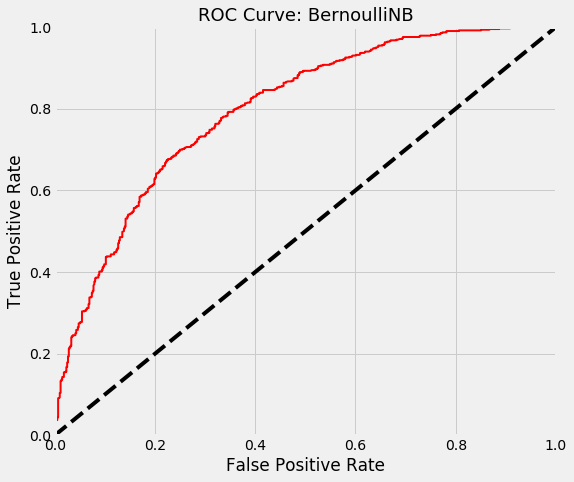

In [174]:
plt.figure(figsize = (8, 7))


plt.plot(fpr_bnb, tpr_bnb, linewidth=2, label= None, color = 'r') 
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
    
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: BernoulliNB', fontsize = 18)

**Explanation:**

A model with no skill that randomly guesses whether an instance belongs to one class or another is represented by the straight dashed line. 

A perfect model has a ROC curve which starts at (0,0, goes to (0,1) and then to (1, 1). In other words, it is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

- We see that our BernoulliNB model is not perfect (no model is) but significantly outperforms a model with no skill. At approximately 80% True Positive Rate/Recall, our model can detect 4 out of 5 people who actually have a mental illness. At the same threshold, it gives us a False Positive Rate of about 40%. This means out of all the people who do not have a mental illness, our model predicts 2 in 5 to have a mental illness

  I believe is a fair tradeoff; we detect the vast majority of people with mental illnesses while offering less than half the people with no mental illness the chance for a checkup or other mental health initiative. This way we could minimise the cost of False Negatives and False Positives


- On the other hand, the AdaBoost model also outperforms the random guesser but its curve is more of a combination of lines joined by an elbow. Visually, it seems the first model outperforms this one.


Luckily, there is a way to prove this for certain using the Area Under the Curve (AUC).A perfect model has an AUC of 1.0.

In [168]:
print('BernoulliNB AUC:', roc_auc_score(y_train, y_scores_bnb))

BernoulliNB AUC: 0.7965541232166847


Our BernoulliNB classifier has an AUC of nearly 80% which supports the interpretation above; the model is not perfect (AUC = 1) or even excellent (AUC > 90), but it is still good

### Precision-Recall Curve

Earlier we mentioned that the threshold which resulted in a Recall of 80% and FPR of 40% was the ideal choice. To find the threshold that results in this combination, we need to plot a precision-recall curve

In [169]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_bnb)

(0, 1)

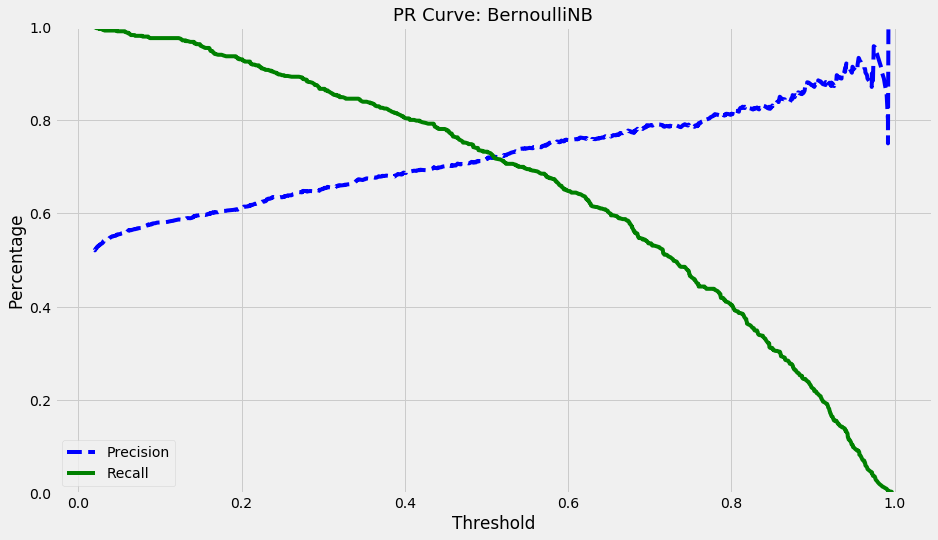

In [170]:
plt.figure(figsize = (14, 8))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plt.xlabel("Threshold")
plt.ylabel('Percentage')
plt.title('PR Curve: BernoulliNB', fontsize  = 18)
plt.legend(loc="lower left")

plt.ylim([0, 1])



The threshold value that results in the combination of recall and precision we need is 0.4. That is how we will make our final predictions when we use test data.

In [172]:
y_train_pred_80_recall = (y_scores_bnb > 0.4)

print('At a threshold of 0.4:')

print('Recall -', recall_score(y_train, y_train_pred_80_recall))

print('Precision -', precision_score(y_train, y_train_pred_80_recall))

At a threshold of 0.4:
Recall - 0.8035714285714286
Precision - 0.6865464632454924


# 8. Deploy

## Automate Pipeline

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

def train_test_model(model, X_train, y_train, X_test, y_test):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = 0.3,
                                                        random_state = 42)

    X_train = X_train.drop(['Country', 'state',
                            'no_employees', 'treatment'], axis = 1)
    
    X_test = X_test.drop(['Country', 'state',
                          'no_employees', 'treatment'], axis = 1)


    # initialise tuned model
    model = BernoulliNB(alpha=0.05, binarize = 0.0,
                          class_prior = None, fit_prior = True)

    
    # find scores by fitting model on X_train and y_train
    y_probs = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")
    y_scores = y_probs[:, 1] # choose positive class scores
    
    ### Here is where I need some help. In my analysis, I chose a threshold of 0.4 from 
    ### which I got a recall score of 80%. However, I could only have done this using a 
    ### PR curve. I don't know how to find an appropriate threshold within this function without
    ### physically seeing the PR curve plotted for the new/test data first. Could you help me here
    ### please?

    # test model and print recall and precision
    #recall = recall_score(y_test, y_predicted)
    #precision = precision_score(y_test, y_predicted)

    #print('The recall score on the test set is {} while the precision score is {}'.format(recall, precision))

# 9. Save Model

In [ ]:
# Save the trained model

bernoulliNB_clf = BernoulliNB(alpha=0.05, binarize = 0.0,
                              class_prior = None, fit_prior = True)

bernoulliNB_clf.fit(X_train, y_train)

bernoulliNB_clf_saved = pickle.dumps(bernoulliNB_clf)

---

# Explanation of evaluation metrics


Let's understand True Positives, True Negatives, False Positives and False Negatives:


  - A TP in our context would occur when a model predicts a person to have sought treatment for mental illness ('treatment' = 'Yes'/1) who in reality did in fact seek treatment (ground truth also = 'Yes'/1). This is desirable
  
  
  - A TN negative is similar but for the reverse case; a model predicts the person did not seek treatment and in reality they actually did not. This is also desirable
  
  
  - A False Positive, on the other hand, is when our model predicts a person sought treatment but they actually did not. This is undesirable
  
  
  - A False negative is the reverse of an FP; the model predicts the person did not seek treatment, but actually they did. This is also undesirable
  
----

Now let's explain the aforementioned evaluation metrics using these concepts:

- **Accuracy**: 

Accuracy answers the question "What percentage of labels did my model label correctly?". In other words, it finds out how well a model can correctly identify *True Positives* (TP) and *True Negatives* (TN). Mathematically, this is given by:

$$  \frac{TP+TN}{TP+TN+FP+FN} $$


Accuracy does not work well when our datasets and particularly our outcome variable is skewed in terms of classes.
Fortunately, this is not the case here; we saw earlier than the 'treatment' values for 'Yes' (1) and 'No (0) are nearly equal. This is the same reason why our baseline prediction had an accuracy of 50% approximately if we always
predicted 'Yes' for 'treatment'

- **Precision**:

Precision is what we generally use when accuracy is not an appropriate measure. In other words, when our classes are skewed. Precision in our context answers the question "when a model predicts a person to have sought treatment for mental illness, what percentage of the time did the person actually seek treatment?". In other words, precision finds out how well a model can distinguish TP from all the cases it predicts as Positive.

Mathematically, this is given by:

$$ \frac{TP}{TP+FP} $$


High precision is desirable when we want to avoid False Positives. In our context, it would mean that we do not want to mislabel individuals who did not seek treatment in truth, but our model says they did. This could be due to, for example, prohibitive costs of pre-emptive mental health checkups. These would not have much value if we consistently performed them on people who do not have a mental illness


- **Recall**:

Recall is often paired with Precision and it answers the question "how many people who have sought treatment can my model actually detect?". It is given by:

$$ \frac{TP}{TP+FN}$$

Where precision only investigates the correct positive predictions (TP) out of all positive predictions, recall provides an indication of missed positive predictions. This means that Recall is about how many people who sought treatment we can accurately detect, compared to the ground truth of the actual number of people that sought treatment.

